In [1]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist()
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print("Train size = %i, test_size = %i"%(len(X_train),len(X_test)))

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
found broken img: ./notMNIST_small/F/Q3Jvc3NvdmVyIEJvbGRPYmxpcXVlLnR0Zg==.png [it's ok if <10 images are broken]
Done
Train size = 14043, test_size = 4681


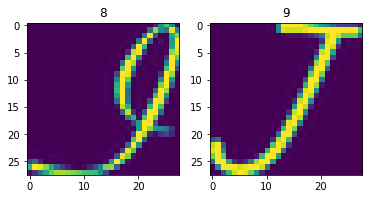

In [2]:
from matplotlib import pyplot as plt

for i in [0,1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_train[i].reshape([28,28]))
    plt.title(str(y_train[i]))

In [3]:
import numpy as np

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
# Your turn: create a multiclass classifier in here for notMNIST dataset.
from sklearn.tree import DecisionTreeClassifier

decision_tree_clf = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

# create a network that stacks layers on top of each other
import torch
from torch import nn
from torch.nn import Sequential
import torchsummary

model = nn.Sequential()
# add first "dense" layer with 784 input units and 10 output unit. 
model.add_module('l1', nn.Linear(784,400))
model.add_module('a1', nn.Sigmoid())
model.add_module('l4', nn.Linear(400, 200))
model.add_module('a4', nn.Sigmoid())
model.add_module('l5', nn.Linear(200, 30))
model.add_module('a5', nn.Sigmoid())
model.add_module('l6', nn.Linear(30, 10))
# model.add_module('a6', nn.LogSoftmax(dim=1))

In [18]:
torchsummary.summary(model,(784,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         314,000
           Sigmoid-2                  [-1, 400]               0
            Linear-3                  [-1, 200]          80,200
           Sigmoid-4                  [-1, 200]               0
            Linear-5                   [-1, 30]           6,030
           Sigmoid-6                   [-1, 30]               0
            Linear-7                   [-1, 10]             310
Total params: 400,540
Trainable params: 400,540
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 1.53
Estimated Total Size (MB): 1.54
----------------------------------------------------------------


In [19]:
# create dummy data with 3 samples and 784 features
x = torch.tensor(X_train[:3], dtype=torch.float32)
y = torch.tensor(y_train[:3], dtype=torch.long)

# compute outputs given inputs, both are variables
y_predicted = model(x)

y_predicted# display what we've got

tensor([[-0.2845,  0.0160,  0.2134,  0.2563, -0.1190,  0.0250,  0.2210,  0.2125,
         -0.0432, -0.5806],
        [-0.2855,  0.0150,  0.2124,  0.2552, -0.1208,  0.0259,  0.2201,  0.2145,
         -0.0442, -0.5824],
        [-0.2830,  0.0168,  0.2115,  0.2550, -0.1222,  0.0273,  0.2180,  0.2114,
         -0.0433, -0.5821]], grad_fn=<AddmmBackward>)

In [20]:
from torch.nn import CrossEntropyLoss, NLLLoss

loss_function =  CrossEntropyLoss()

In [21]:
loss = loss_function(y_predicted, y)

In [22]:
loss.backward()

In [10]:
list(model.parameters())[0].grad

tensor([[ 3.2367e-05,  3.2367e-05,  3.2367e-05,  ...,  3.2367e-05,
          3.2367e-05,  3.2367e-05],
        [-1.3533e-04, -1.3533e-04, -1.3533e-04,  ..., -1.3533e-04,
         -1.3533e-04, -1.3533e-04],
        [ 6.9419e-06,  6.9419e-06,  6.9419e-06,  ...,  6.9419e-06,
          6.9419e-06,  6.9419e-06],
        ...,
        [-2.7791e-06, -2.7791e-06, -2.7791e-06,  ..., -2.7791e-06,
         -2.7791e-06, -2.7791e-06],
        [ 7.3663e-05,  7.3663e-05,  7.3663e-05,  ...,  7.3663e-05,
          7.3663e-05,  7.3663e-05],
        [-3.3294e-05, -3.3294e-05, -3.3294e-05,  ..., -3.3294e-05,
         -3.3294e-05, -3.3294e-05]])

In [23]:
from torch.optim import Adam

opt = torch.optim.Adam(model.parameters(), lr = 3e-4)


In [24]:
loss = loss_function(y_predicted,
                     y)
